# Язык программирования Python
## Домашняя работа, модуль 2

```
Бобер Станислав Алексеевич
Ст. преп. Департамента Прикладной Математики
e-mail: sbober@hse.ru, stas.bober@gmail.com
```

-----
## Выполненную работу необходимо загрузить по ссылке:
[ЗАГРУЗИТЬ РЕШЕНИЕ](https://www.dropbox.com/request/E8TCuKxENnYjtADTLPOX)



Обязательные требования:
----------------------------------------
- Каждый студент решает задания в своём ноутбуке. Решения, сданные в других ноутбуках не принимаются.
- Решение должно размещаться сразу после ячейки с заданием в одной или нескольких ячейках.
- Каждое решение должно быть независимо от решений других заданий, т.е. все необходимые импорты должны присутствовать в решении каждого задания.
- В каждом решении результат должен быть выведен на экран.
- Чем более общее решение, тем выше оценка.

-----
#### Задание 0

В архиве `evolution.zip` находятся 360 файлов с именами `evolution_NNN.txt`, где `NNN = 000...359` - номер орбиты. В первом столбце каждого файла записаны расстояния (в км) перицентров орбиты (ближайших к планете точек) на каждый из 225 дней.

Необходимо:
1. Сформировать `DataFrame`, в котором 225 столбцов и 360 строк. Каждая строка соответствует орбите, а столбец - дню. В ячейках записаны расстояния перицентров.
2. Найти номера орбит, расстояние перицентров которых всегда больше 6350 км.
3. Изобразить цветовую карту (`contourf`): по оси абсцисс - номер орбиты, по оси ординат - номер дня, цветом отображены расстояния перицентров. Рядом с цветовой картой изобразить colorbar.
4. Изобразить поверх цветовой карты изолинии (`contour`), соответствующие уровням 6050, 6250, 6350 км.

In [28]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.DataFrame()
with ZipFile("evolution.zip", "r") as f:
    for i, name in enumerate(f.namelist()):
        data[i] = pd.read_csv(f.open(name), sep="\s+").iloc[:,0]
data = data.T
data

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,6450.644530,6449.351129,6447.931157,6446.396441,6444.759226,6443.032137,6441.228128,6439.360433,6437.442517,6435.488028,...,6930.636647,6931.076880,6931.307711,6931.334868,6931.164805,6930.804682,6930.262342,6929.546286,6928.665645,6927.630146
1,6450.548195,6449.153993,6447.628947,6445.985088,6444.234880,6442.391177,6440.467169,6438.476340,6436.432411,6434.349292,...,6921.510946,6921.901404,6922.076918,6922.043262,6921.806953,6921.375233,6920.756047,6919.958010,6918.990386,6917.863049
2,6450.448843,6448.950883,6447.317872,6445.562051,6443.696109,6441.733129,6439.686548,6437.570099,6435.397765,6433.183721,...,6912.156048,6912.493375,6912.610215,6912.512394,6912.206503,6911.699873,6911.000552,6910.117281,6909.059462,6907.837124
3,6450.346609,6448.742075,6446.998353,6445.127901,6443.143632,6441.058870,6438.887296,6436.642899,6434.339925,6431.992821,...,6902.580453,6902.861588,6902.916693,6902.751657,6902.373145,6901.788585,6901.006137,6900.034672,6898.883734,6897.563514
4,6450.241625,6448.527835,6446.670794,6444.683179,6442.578135,6440.369227,6438.070385,6435.695859,6433.260159,6430.778005,...,6892.796387,6893.018427,6893.008902,6892.773764,6892.319763,6891.654425,6890.786030,6889.723581,6888.476775,6887.055966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,6451.077101,6450.239470,6449.297586,6448.262329,6447.144935,6445.956962,6444.710238,6443.416824,6442.088966,6440.739048,...,6972.362792,6973.001848,6973.459047,6973.739988,6973.850902,6973.798635,6973.590631,6973.234905,6972.740015,6972.115040
356,6450.997507,6450.075536,6449.044730,6447.916147,6446.701214,6445.411691,6444.059621,6442.657291,6441.217182,6439.751920,...,6964.572745,6965.179082,6965.598087,6965.835369,6965.897191,6965.790447,6965.522647,6965.101890,6964.536836,6963.836679
357,6450.914343,6449.904513,6448.781322,6447.556012,6446.240207,6444.845875,6443.385279,6441.870938,6440.315570,6438.732052,...,6956.495817,6957.065775,6957.442905,6957.632836,6957.641868,6957.476952,6957.145673,6956.656218,6956.017357,6955.238408
358,6450.827727,6449.726638,6448.507725,6447.182416,6445.762539,6444.260274,6442.688111,6441.058801,6439.385308,6437.680763,...,6948.137563,6948.667774,6948.999643,6949.138825,6949.091664,6948.865174,6948.467019,6947.905484,6947.189452,6946.328370


In [31]:
data.loc[(data > 6350).all(axis=1), :].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            350, 351, 352, 353, 354, 355, 356, 357, 358, 359],
           dtype='int64', length=240)

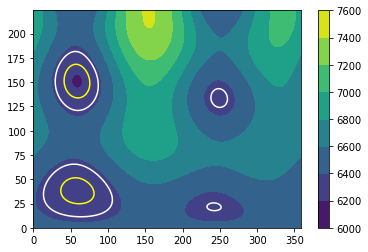

In [8]:
plt.contourf(data.T)
plt.colorbar()
plt.contour(data.T, levels=[6050, 6250, 6350], colors=["red", "yellow", "white"])

-----
#### Задание 1

В файле `PR_HLY_L1_Sun-Earth (default).npy` находится массив `numpy` с плоскими кривыми - горизонтальными орбитами Ляпунова, лежащими в плоскости XY. Орбиты заданы в полярной системе координат `r-theta` с центром в точке $L_1$, лежащей на оси X. Каждой орбите соответствует строка массива, где записаны длины радиус-векторов каждой точки орбиты от точки $L_1$. Все радиус-вектора соответствуют углам `theta = np.linspace(0., np.pi, 720)`.
Функция `w` определена ниже.

Необходимо: 
1. На каждой орбите найти точку, соответствующую минимуму функции $\omega$
2. Изобразить на графике все орбиты и найденные точки

$ w(x,y) = \frac{x^2 + y^2}{2} + \frac{1 - \mu}{r_1} + \frac{\mu}{r_2} $

$ r_1 = \sqrt{(x + \mu)^2 + y^2} $

$ r_2 = \sqrt{((x - (1-\mu))^2 + y^2} $

$ \mu = 3.001348389698916e-06 $

$ L_1 = 0.9900289479871328 $

Для поиска минимума следует для каждой орбиты:
0. сформировать массивы `r` (строка из файла) и `theta = np.linspace(0., np.pi, 720)`
1. построить сплайн `sr(theta)` при помощи `scipy.interpolate.InterpolatedUnivariateSpline` и данных из `п.0.`
2. написать функцию `rth2xy(r, theta)` для вычисления координат `x-y` по координатам `r-theta` (не забывая, что `r` задан относительно $L_1$)
3. написать функцию вычисления `w(x, y)`
4. написать функцию вычисления `w1(theta) = w(rth2xy(sr(theta), theta))`, используя `пп.1.,2.,3.`
5. минимизировать функцию `w1(theta)` для `theta` на отрезке `[1, 2.2]` при помощи `scipy.optimize.fminbound`
6. по полученному `theta*` вычислить `x*,y* = rth2xy(sr(theta*), theta*)`

In [1]:
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fminbound
import matplotlib.pyplot as plt

In [2]:
data = np.load("PR_HLY_L1_Sun-Earth (default).npy")
theta = np.linspace(0., np.pi, 720)
mu = 3.001348389698916e-06
L1 = 0.990028947987132

In [3]:
def r1(x, y):
    return np.sqrt((x+mu)**2 + y**2)

def r2(x, y):
    return np.sqrt((x-(1-mu))**2 + y**2)

def w(x, y):
    return (x**2 + y**2)/2 +  (1-mu)/r1(x, y) + mu/r2(x, y)

def sr(theta, r):
    return InterpolatedUnivariateSpline(theta, r)

def rth2xy(theta, r):
    return r*np.cos(theta) + L1, r*np.sin(theta)

def w1(theta, r):
    return lambda t: w(*(rth2xy(t, sr(theta, r)(t))))    

def ans(theta, r):
    w_to_min = w1(theta, r)
    theta_min = fminbound(w_to_min, 1, 2.2)
    return rth2xy(theta_min, sr(theta, r)(theta_min))

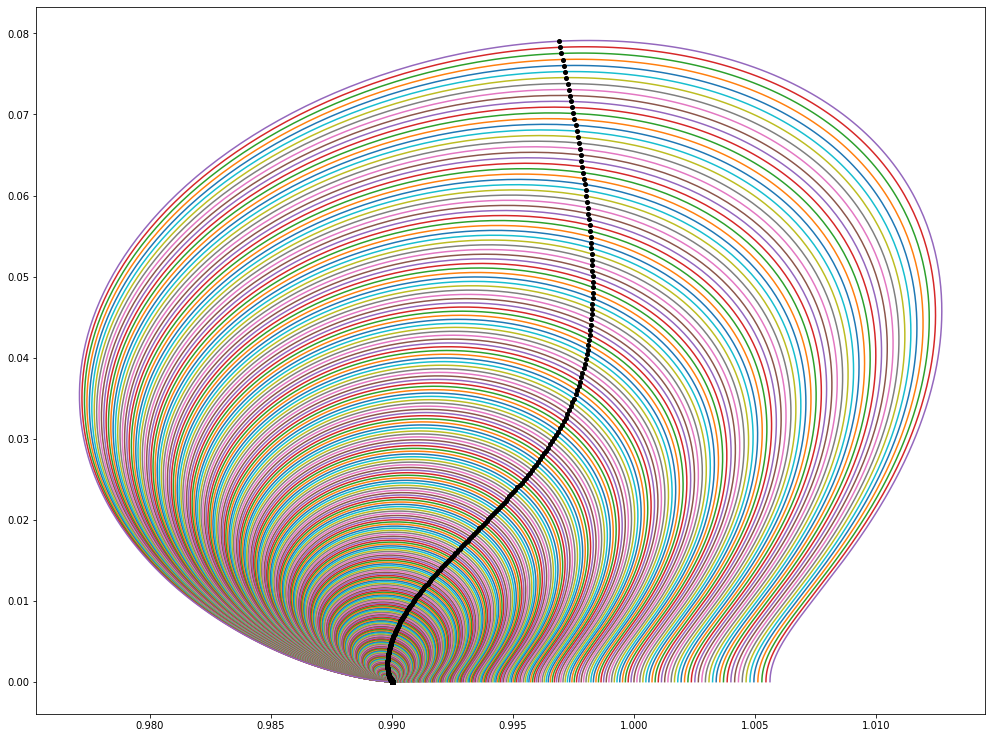

In [59]:
plt.figure(figsize=(17,13))
for r in data:
    plt.plot(*rth2xy(theta, r),zorder=-1)
    plt.scatter(*ans(theta, r), color="black", s=16, zorder=1)
plt.show()

In [5]:
w_to_min = w1(theta, data[1])
theta_min = fminbound(w_to_min, 1, 2.2)
theta_min

1.6550307587915234

In [10]:
w_to_min(0)

1.5004451372988963

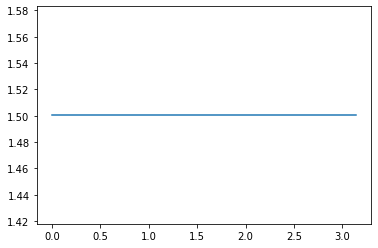

In [9]:
plt.plot(theta, w_to_min(theta))

-----
#### Задание 2

Рассчитать и изобразить:
- [множество Мандельброта](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%9C%D0%B0%D0%BD%D0%B4%D0%B5%D0%BB%D1%8C%D0%B1%D1%80%D0%BE%D1%82%D0%B0) (четный номер в списке студентов)
- [фрактал Ляпунова](https://ru.wikipedia.org/wiki/%D0%A4%D1%80%D0%B0%D0%BA%D1%82%D0%B0%D0%BB_%D0%9B%D1%8F%D0%BF%D1%83%D0%BD%D0%BE%D0%B2%D0%B0) (нечетный номер в списке студентов)

План решения задачи:
1. написать функцию для расчета в одной точке плоскости (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
2. написать функцию для расчета на прямоугольной равномерной решетке (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
3. выполнить расчет и получить матрицу значений
4. при помощи `imshow` изобразить полученную матрицу (цветовую карту cmap выбрать самостоятельно)


In [1]:
from math import log
from numba import njit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
@njit
def lapunov(x,y, seed="AB", N_Max=1000):
    lam = 0
    rs = x if seed[0]=="A" else y
    xs = rs * 0.5 * (1 - 0.5)
    for i in range(1,N_Max):
        xs = rs * xs * (1-xs)
        rs = x if seed[i % len(seed)]=="A" else y
#         print(xs, rs)
        to_sum = rs * (1-2*xs)
        if to_sum == 0:
            break
        lam += np.abs(np.log(np.abs(to_sum)))
        rs = x if seed[(i-1) % len(seed)]=="A" else y
    return lam/N_Max

@njit
def rect_lapunov(a, b, c, d, n_dots=1000, N_Max=1000, seed="AABAB"):
    rect = np.empty((n_dots,n_dots))
    for i, x in enumerate(np.linspace(a, c, n_dots)):
        for j, y in enumerate(np.linspace(b, d, n_dots)):
            rect[i,j] = lapunov(x, y, N_Max=N_Max, seed=seed)
    return rect

In [3]:
%%time
rect = rect_lapunov(2, 2, 4, 4, n_dots=1000)

Wall time: 4min 16s


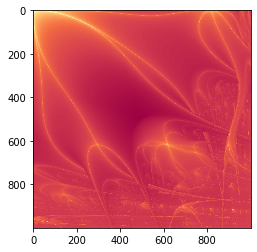

In [6]:
plt.imshow(rect, cmap="Spectral")

-----
#### Задание 3

В файле fin.csv находится информация о доходах и расходах физического лица.

Требуется:
1. Рассчитать среднемесячный доход на каждый год
2. Среднемесячный расход по каждой категории на каждый год
3. Рассчитать сводную таблицу суммарных расходов: строки - Категория/Год, столбцы - Месяц.
4. Для каждой пары (Категория, Год) изобразить столбчатую диаграмму: суммарные расходы на каждый месяц (использовать таблицу из п.3).
5. Рассчитать ежедневный баланс (доход-расход) и изобразить график.

In [19]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("fin.csv", sep = ",", encoding="UTF-8")
data.columns=["t", "s", "c"]

In [21]:
data["t"] = pd.DatetimeIndex(data["t"])
data["y"] = data["t"].apply(lambda x: x.year)
data["m"] = data["t"].apply(lambda x: x.month)
data["d"] = data["t"].apply(lambda x: x.day)
data = data.drop(columns=["t"])

In [22]:
data = pd.read_csv("fin.csv", sep = ",", encoding="UTF-8")
data.columns=["t", "s", "c"] 
data["t"] = pd.DatetimeIndex(data["t"])
data["y"] = data["t"].apply(lambda x: x.year)
data["m"] = data["t"].apply(lambda x: x.month)
data["d"] = data["t"].apply(lambda x: x.day)
data = data.drop(columns=["t"])

In [23]:
incomes = data[data["s"] > 0][:]
incomes.groupby(["y","m"])["s"].mean()

y     m 
2017  4     50000.000000
      5      8019.142857
      6     13173.357143
      7      8142.642857
      8      8581.571429
      9      6340.153846
      10    15998.500000
      11    20561.000000
      12    12914.440000
2018  1      6374.857143
      2      9657.466667
      3     13474.769231
      4     20082.700000
      5     21112.250000
      6     17742.750000
      7     13418.700000
      8      9087.100000
      9     17100.928571
      10    12422.647059
      11    12630.823529
      12    15337.687500
2019  1      9040.000000
      2     11373.714286
      3     10157.250000
      4     13904.125000
      5     12717.882353
      6     16632.620690
      7     16654.733333
      8      9417.571429
      9     10459.333333
Name: s, dtype: float64

In [24]:
consumptions = data[data["s"] < 0]
consumptions.groupby(["y","m","c"])["s"].mean()

y     m  c                 
2017  4  Еда                    -207.666667
         Интернет и телефон     -600.000000
         Путешествия          -10050.700000
      5  Еда                   -1060.625000
         Интернет и телефон    -5000.000000
                                   ...     
2019  9  Обучение               -823.000000
         Одежда и обувь       -10996.000000
         Подарки              -30000.000000
         Транспорт              -820.750000
         Хобби                 -1439.000000
Name: s, Length: 316, dtype: float64

In [25]:
table = consumptions.pivot_table(values='s', index=['y', 'c'],  columns=['m'], aggfunc=sum)
table

m                                1        2        3         4        5   \
y    c                                                                     
2017 Автомобиль                 NaN      NaN      NaN       NaN      NaN   
     Дом                        NaN      NaN      NaN       NaN      NaN   
     Доходы                     NaN      NaN      NaN       NaN      NaN   
     Еда                        NaN      NaN      NaN    -623.0 -16970.0   
     Здоровье                   NaN      NaN      NaN       NaN      NaN   
     Интернет и телефон         NaN      NaN      NaN    -600.0  -5000.0   
     Комплектующие              NaN      NaN      NaN       NaN      NaN   
     Компьютер и программы      NaN      NaN      NaN       NaN   -780.0   
     Красота и здоровье         NaN      NaN      NaN       NaN      NaN   
     Обучение                   NaN      NaN      NaN       NaN      NaN   
     Одежда и обувь             NaN      NaN      NaN       NaN      NaN   
     Подарки                    NaN      NaN      NaN       NaN -14200.0   
     Путешествия                NaN      NaN      NaN -100507.0 -23987.0   
     Развлечения                NaN      NaN      NaN       NaN  -2870.0   
     Спорт                      NaN      NaN      NaN       NaN      NaN   
     Стройматериалы             NaN      NaN      NaN       NaN      NaN   
     Транспорт                  NaN      NaN      NaN       NaN  -1700.0   
     Украшения                  NaN      NaN      NaN       NaN      NaN   
     Хобби                      NaN      NaN      NaN       NaN      NaN   
2018 Автомобиль                 NaN      NaN  -1800.0       NaN      NaN   
     Дом                   -64745.0 -42938.0 -43050.0  -43611.0 -61444.0   
     Еда                   -23050.0 -29695.0 -23176.0  -32073.0 -25677.0   
     Здоровье                   NaN      NaN      NaN       NaN      NaN   
     Интернет и телефон     -1000.0  -1000.0   -500.0   -2000.0  -1561.0   
     Комплектующие         -31641.0  -3081.0      NaN  -21300.0      NaN   
     Компьютер и программы      NaN  -3840.0   -874.0 -106507.0      NaN   
     Красота и здоровье     -3000.0  -5921.0      NaN       NaN   -800.0   
     Обучение               -4585.0  -4061.0      NaN   -2900.0   -800.0   
     Одежда и обувь         -9999.0  -1500.0      NaN       NaN  -6500.0   
     Подарки                    NaN  -1000.0 -17680.0  -22900.0 -20650.0   
     Путешествия           -10241.0  -5579.0  -6000.0       NaN -51671.0   
     Развлечения            -5990.0      NaN  -1320.0    -500.0      NaN   
     Спорт                 -32150.0 -50132.0 -14700.0   -6300.0      NaN   
     Транспорт              -5140.0  -3956.0  -6665.0   -3858.0  -2032.0   
     Украшения                  NaN      NaN      NaN       NaN      NaN   
     Хобби                      NaN      NaN  -2630.0   -4182.0  -3286.0   
2019 Дом                   -39690.0 -39500.0 -38720.0  -38000.0 -47969.0   
     Доходы                 -2000.0      NaN      NaN       NaN      NaN   
     Еда                   -24934.0 -23443.0 -31037.0  -26086.0 -33386.0   
     Здоровье                   NaN      NaN      NaN       NaN      NaN   
     Интернет и телефон     -1000.0  -1470.0  -4000.0   -1300.0  -1000.0   
     Комплектующие         -18690.0 -17890.0  -1250.0  -17700.0 -10897.0   
     Компьютер и программы      NaN      NaN   -179.0       NaN      NaN   
     Красота и здоровье     -3600.0   -615.0  -1400.0    -448.0  -1115.0   
     Обучение                   NaN  -2900.0   -450.0   -3500.0  -7590.0   
     Одежда и обувь             NaN  -2000.0   -540.0       NaN -12374.0   
     Подарки                 -690.0  -6900.0   -450.0   -2070.0 -13642.0   
     Путешествия                NaN      NaN      NaN -125000.0      NaN   
     Развлечения            -6800.0      NaN      NaN       NaN   -200.0   
     Спорт                      NaN      NaN      NaN       NaN  -6000.0   
     Транспорт              -5516.0  -6825.0  -2

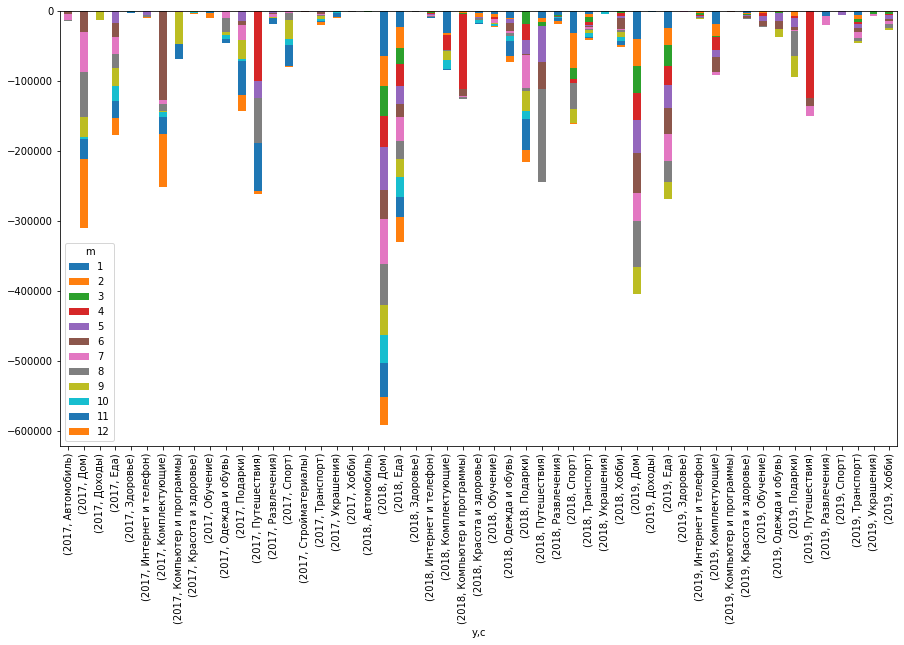

In [26]:
_, ax = plt.subplots(1, figsize=(15, 8))
table.plot(kind='bar', stacked=True, ax = ax)
plt.show()

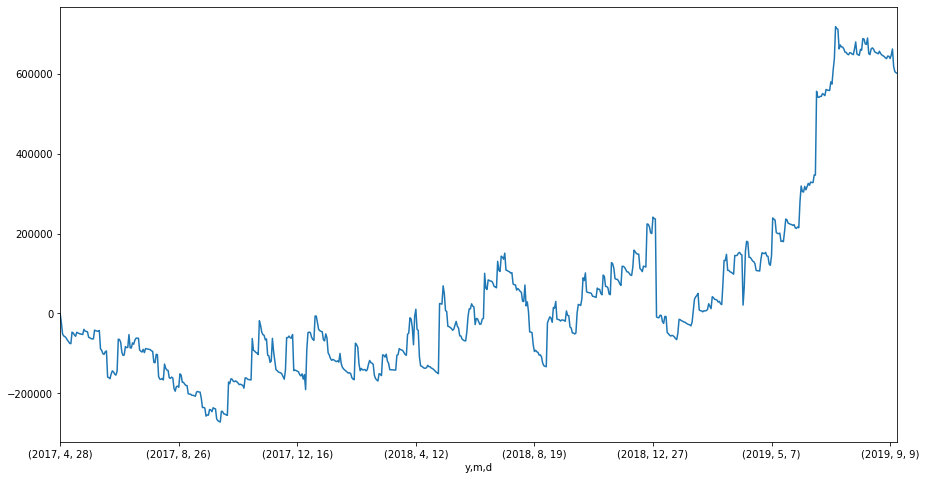

In [27]:
_, ax = plt.subplots(1, figsize=(15, 8))
data.groupby(["y", "m", "d"])["s"].sum().groupby(level=[0]).cumsum().plot(ax = ax)
plt.show()

-----
#### Задание 4

`hard`

Баскетболист ростом 2 м бросает мяч в вертикальную стену, расположенную на расстоянии 10 м от него. Мяч ударяется о стену и/или пол и возвращяется к баскетболисту в руки. 

Требуется:
1. Рассчитать угол и начальную скорость броска мяча.
2. Рассмотреть 2 качественно различных варианта броска. Для каждого варианта изобразить итоговую траекторию движения, точки соударений.

Допущения:
- мяч является материальной точкой, 
- мяч начинает движение точно над головой баскетболиста,
- мяч вернулся к баскетболисту, если его возвратная траектория проходит не далее 30 см от начального положения мяча,
- угол падения равен углу отскока,
- при каждом ударе мяч теряет 10% кинетической энергии.

Способы решения:
1. Аналитический, на основе "школьных" формул
2. Численный: записать уравнения движения, проинтегрировать на заданное время, найти точку пересечения траектории и препятствия, пересчитать начальные условия для следующего участка траектории, и т.д. Для интегрирования можно использовать `scipy.integrate.ode`.

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
from scipy.integrate import ode
from ipywidgets import interactive, fixed

In [18]:
%matplotlib notebook

Hit the wall


Traceback (most recent call last):
  File "C:\Users\Roman\dev\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Roman\dev\Miniconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [19]:
m = 1
h = 2
l = 10

In [20]:
def rect(r, theta):
    x = r * math.cos(math.radians(theta))
    y = r * math.sin(math.radians(theta))
    return x,y

def polar(x, y):
    r = (x ** 2 + y ** 2) ** .5
    theta = math.degrees(math.atan2(y,x))
    return r, theta

In [21]:
def start(t, sp, params):
    x, y = sp
    vx_c, vy_c, m = params 
    vx = vx_c
    vy = vy_c - m*9.8 * t
    return np.array([vx, vy])

In [22]:
def find_x_zero(x_start, y_start, vx_start, vy_start, m, ode_func, prop, t_delta=0.1, eps=0.001):
    while True:
        prop.set_f_params([vx_start, vy_start, m]);
        prop.set_initial_value([x_start, y_start], 0)
        x_end, y_end = prop.integrate(t_delta)
        vx_end, vy_end = ode_func(t_delta, [x_start, y_start], [vx_start, vy_start, m])
        if abs(x_end)<eps:
            return x_end, y_end, vx_end, vy_end, t_delta
        if x_end > 0:
            x_start, y_start, vx_start, vy_start = x_end, y_end, vx_end, vy_end
        else:
            t_delta /= 2
            
def find_y_zero(x_start, y_start, vx_start, vy_start, m, ode_func, prop, t_delta=0.1, eps=0.001):
    while True:
        prop.set_f_params([vx_start, vy_start, m]);
        prop.set_initial_value([x_start, y_start], 0)
        x_end, y_end = prop.integrate(t_delta)
        vx_end, vy_end = ode_func(t_delta, [x_start, y_start], [vx_start, vy_start, m])
        if abs(y_end)<eps:
            return x_end, y_end, vx_end, vy_end, t_delta
        if y_end > 0:
            x_start, y_start, vx_start, vy_start = x_end, y_end, vx_end, vy_end
        else:
            t_delta /= 2

In [23]:
def simulate(x_start, y_start, vx_start, vy_start, m, ode_func, vmin=0.1, r=0.3,
             time_delta=0.01, kinetic_enegry_loss=0.1, time_limit=1000):
    vx, vy = vx_start, vy_start
    vx_old, vy_old = vx, vy
    x, y = x_start, y_start
    x_old, y_old = x, y
    v = np.sqrt(vx**2 + vy**2)
    xy = np.array([x, y])
    trajectory = np.array([xy])
    was_out_of_sircle = False
    time_past = 0
    prop = ode(ode_func)
    prop.set_integrator('dop853')
    while (v>vmin):
        if time_past > time_limit:
            return False, trajectory, "Experiment runs out of time"
        prop.set_f_params([vx, vy, m])
        prop.set_initial_value(xy, 0)
        xy = prop.integrate(time_delta)
        x_old, y_old = x, y
        x, y = xy
        vx_old, vy_old = vx, vy
        vx, vy = ode_func(time_delta, xy, [vx, vy, m])
        time_to_sum=time_delta
        if (x-x_start)**2 + (y - y_start)**2 <= r**2 and was_out_of_sircle:
            return True, trajectory, "Success"
        if not was_out_of_sircle and (x-x_start)**2 + (y - y_start)**2 >= r**2:
            was_out_of_sircle=True
        if x>x_start+0.5:
            return False, trajectory, "Flown away by x"

        if x<=0:
            print("Hit the wall")
            x, y, vx, vy, time_to_sum = find_x_zero(x_old, y_old, vx_old, vy_old, m, ode_func, prop, t_delta=time_delta)
            xy =  np.array([x, y])
            vx = -vx
            prop.set_f_params([vx, vy, m])
            v *= np.sqrt((1-kinetic_enegry_loss))
            vx *= np.sqrt((1-kinetic_enegry_loss))
            vy *= np.sqrt((1-kinetic_enegry_loss))
            # Если x==0, то пересчитать начальные условия (инвертировать скорость по y)
        if y<=0:
            print("Hit the floor")
            x, y, vx, vy, time_to_sum = find_y_zero(x_old, y_old, vx_old, vy_old, m, ode_func, prop, t_delta=time_delta)
            xy =  np.array([x, y])
            vy = -vy
            prop.set_f_params([vx, vy, m])

            v *= np.sqrt((1-kinetic_enegry_loss))
            vx *= np.sqrt((1-kinetic_enegry_loss))
            vy *= np.sqrt((1-kinetic_enegry_loss))
            # Если y==0, то пересчитать начальные условия (инвертировать скорость по x)   
        trajectory = np.concatenate((trajectory, xy.reshape(1,2)))
        time_past += time_to_sum
    return False, trajectory, "Energy lost"

In [24]:
def notebook_manipulation(v, omega, consts):
    l, h, m, start = consts
    vx, vy = rect(v, omega)
    ans, traj, comment = simulate(l, h, vx, vy, m, start)
    fig, ax = plt.subplots(1, figsize=(l-3,h+1))
    circle = plt.Circle((l, h), 0.3, color='r', alpha=0.3)
    x, y = traj.T
    ax.plot(x, y)
    ax.scatter(l, h)
    ax.set_xlim((-0.5,max(x)))
    ax.set_ylim(-0.5, max(y))
    ax.add_artist(circle)

In [25]:
def animate_simulation(l, h, vx, vy, m, start, time_limit=0.1, figax=None, x_max = 11 , y_max = 3): 
    if figax is None:
        fig, ax = plt.subplots(1, figsize=(l-3,h+1))
    else:
        fig, ax = figax
    way, = ax.plot([], [])
    
    circle = plt.Circle((l, h), 0.3, color='r', alpha=0.3)
    ball, = ax.plot(l, h, '.', ms=20)
    ax.add_artist(circle)
    xx_max, yy_max = x_max, y_max
    ax.set_xlim((-0.5, x_max))
    ax.set_ylim((-0.5, y_max))
    
    def init():
        way.set_data([], [])
        return way,
    
    def animate(i):
        _, traj, _ = simulate(l, h, vx, vy, m, start, time_limit=time_limit*i)
        x, y = traj.T
        ax.set_xlim((-0.5, max(x)))
        ax.set_ylim((-0.5, max(y)))
        way.set_xdata(x)
        way.set_ydata(y)
        ball.set_xdata(x[-1])
        ball.set_ydata(y[-1])
        return way,
    
    anim = FuncAnimation(fig, animate, init_func=init,
                           frames=200, interval=120, blit=True)
    return anim

In [26]:
def matolitlib_manipulation(v, omega, consts):
    l, h, m, start = consts
    vx, vy = rect(v, omega)
    x_max, y_max = (12, 6)
    
    fig, ax = plt.subplots(1, figsize=(l-3,h+1))
    plt.subplots_adjust(left=0.25, bottom=0.25)
    
    ax.set_xlim((-0.5, x_max))
    ax.set_ylim((-0.5, y_max))
    
    axcolor = 'lightgoldenrodyellow'
    axv = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
    axomega = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
    
    v_slider = Slider(axv, 'Speed', 0., 40.0, valinit=v)
    omega_slider = Slider(axomega, 'Angle', 0., 360.0, valinit=omega)
    a = animate_simulation(l, h, vx, vy, m, start,figax=(fig, ax))
    
    def update(val):
        v = v_slider.val
        omega = omega_slider.val
        vx, vy = rect(v, omega)
        a = animate_simulation(l, h, vx, vy, m, start,figax=(fig, ax), x_max=x_max, y_max=y_max)
        fig.canvas.draw()

    
    # call update function on slider value change
    v_slider.on_changed(update)
    omega_slider.on_changed(update)




    plt.show()

In [27]:
v, omega = 20, 165
vx, vy = rect(v, omega)
ans, traj, comment = simulate(l, h, vx, vy, m, start)
print(comment)

Hit the wall
Success


<IPython.core.display.Javascript object>


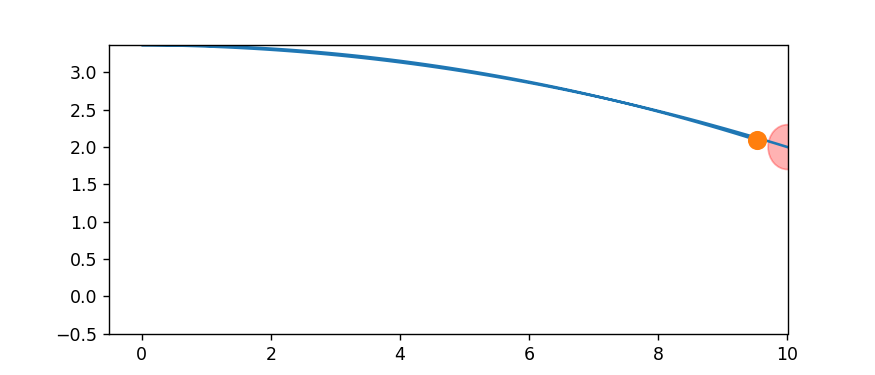

In [28]:
animate_simulation(l, h, vx, vy, m, start)

In [16]:
interactive_plot = interactive(notebook_manipulation, v=v, omega=omega, consts=fixed((l, h, m, start)))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=13, description='v', max=39, min=-13), IntSlider(value=145, description=…

Hit the wall


<IPython.core.display.Javascript object>


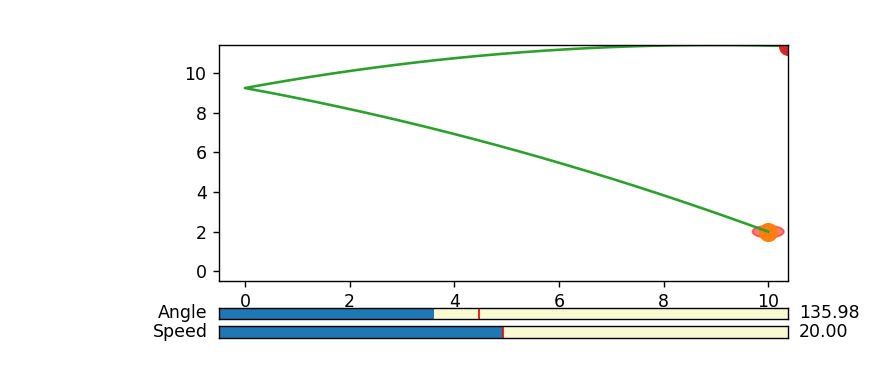

In [14]:
matolitlib_manipulation(v, omega, (l, h, m, start))

In [29]:
v, omega = 13, 162
vx, vy = rect(v, omega)
ans, traj, comment = simulate(l, h, vx, vy, m, start)
print(comment)

Hit the wall
Hit the floor
Success


<IPython.core.display.Javascript object>


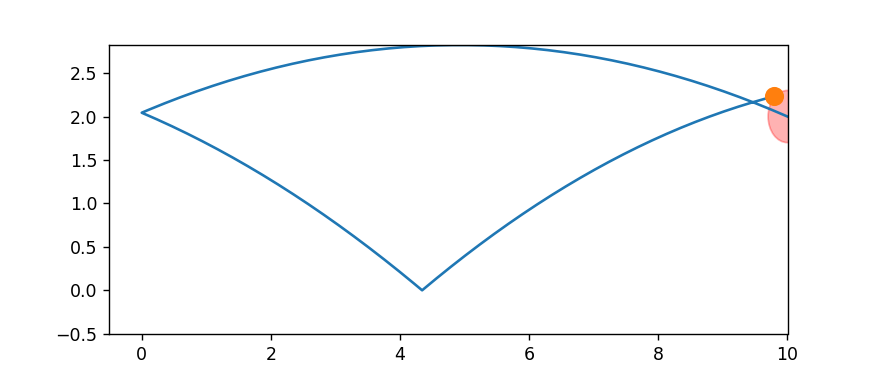

In [30]:
animate_simulation(l, h, vx, vy, m, start)

In [31]:
v, omega = 100, 90+0.39
vx, vy = rect(v, omega)
ans, traj, comment = simulate(l, h, vx, vy, m, start)
print(comment)

Hit the wall
Hit the floor
Flown away by x


<IPython.core.display.Javascript object>


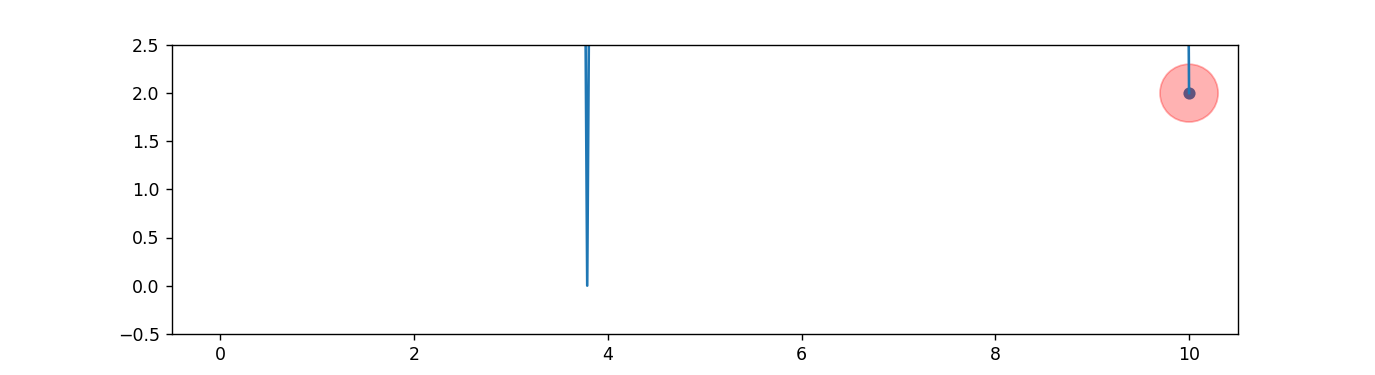

In [32]:
fig, ax = plt.subplots(1, figsize=(l+1,h+1))
circle = plt.Circle((l, h), 0.3, color='r', alpha=0.3)
ax.plot(traj.T[0], traj.T[1])
ax.scatter(l, h)
ax.set_ylim(top =h+0.5, bottom = 0-0.5)
ax.set_xlim(right=l+0.5, left = 0-0.5)
ax.add_artist(circle)
# ax.set_aspect(1)

In [171]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [172]:
def to_rect(r, t):
    x = r * np.cos(np.radians(t))
    y = r * np.sin(np.radians(t))
    return x,y

def to_polar(x, y):
    r = (x ** 2 + y ** 2) ** 0.5
    theta = np.degrees(np.atan2(y,x))
    return r, theta

In [173]:
def xy(vx, vy, F, t, x_0, y_0):
    x=vx*t + x_0
    y=vy*t - F * t**2 /2 + y_0
    return x,y

In [174]:
def vxvy(vx, vy, F, t):
    return vx, vy - F * t

In [175]:
# об стенку и поймал
F=9.81
vx_0, vy_0=10, 10
x_0, y_0 = 0, 2
t_1 = abs(10/vx_0)
ts=np.linspace(0, t_1, 1000)
xs, ys = xy(vx_0,vy_0,F,ts, x_0, y_0)
vs = vxvy(vx_0, vy_0, F, t_1)

In [176]:
x_1 = xs[-1]
y_1 = ys[-1]
vx_1 = -(0.9)**0.5 * vs[0]
vy_1 = (0.9)**0.5 * vs[1]
t_2 = abs(10/vx_1)
ts=np.linspace(0, t_2, 1000)
xs_new, ys_new = xy(vx_1,vy_1,F,ts, x_1, y_1)
xs = np.concatenate((xs,xs_new))
ys = np.concatenate((ys,ys_new))

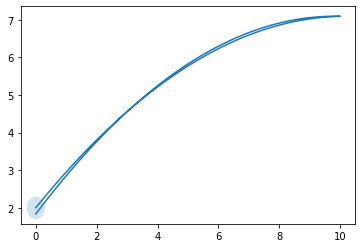

In [177]:
fig, ax = plt.subplots(1)
ax.plot(xs,ys)
circle = plt.Circle((0, 2), 0.3, alpha=0.2)
ax.add_artist(circle)

In [178]:
# об стенку, об пол и поймал
F=9.81
vx_0, vy_0= to_rect(14.1,13)
x_0, y_0 = 0, 2
t_1 = abs(10/vx_0)
ts=np.linspace(0, t_1, 1000)
xs, ys = xy(vx_0,vy_0,F,ts, x_0, y_0)
vs = vxvy(vx_0, vy_0, F, t_1)

In [179]:
x_1 = xs[-1]
y_1 = ys[-1]
vx_1 = -(0.9)**0.5 * vs[0]
vy_1 = (0.9)**0.5 * vs[1]
t_2 = (vy_1 + (2*F*y_1+vy_1**2)**0.5)/F
ts=np.linspace(0, t_2, 1000)
xs_new, ys_new = xy(vx_1,vy_1,F,ts, x_1, y_1)
vs = vxvy(vx_1, vy_1, F, t_2)
xs = np.concatenate((xs,xs_new))
ys = np.concatenate((ys,ys_new))

In [180]:
x_2 = xs[-1]
y_2 = ys[-1]
vx_2 = (0.9)**0.5 * vs[0]
vy_2 = -(0.9)**0.5 * vs[1]
t_3 = abs(x_2/vx_2)
ts=np.linspace(0, t_3, 1000)
xs_new, ys_new = xy(vx_2,vy_2,F,ts, x_2, y_2)
xs = np.concatenate((xs,xs_new))
ys = np.concatenate((ys,ys_new))

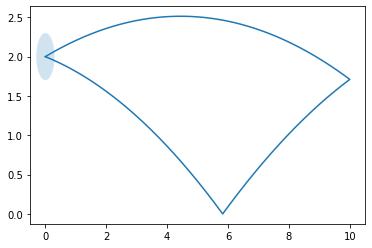

In [181]:
fig, ax = plt.subplots(1)
ax.plot(xs,ys)
circle = plt.Circle((0, 2), 0.3, alpha=0.2)
ax.add_artist(circle)